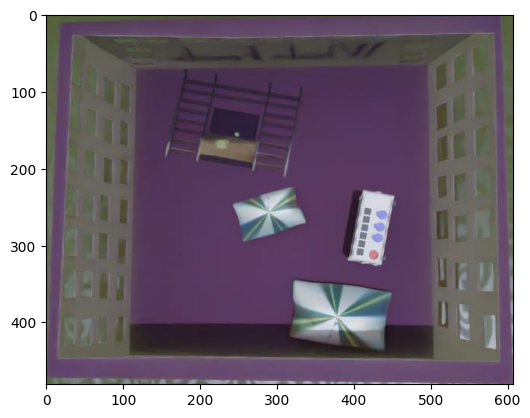

In [1]:
rgb_img = '/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/rgb.jpg'
#open the image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
img = Image.open(rgb_img)
img = np.array(img)
plt.imshow(img)
plt.show()


In [2]:
img.shape

(481, 607, 3)

In [5]:
gt = '/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/bbox3d.npy'
#load the gt
gt = np.load(gt)
gt.shape

(4, 8, 3)

In [7]:
pc = '/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/pc.npy'
pc = np.load(pc)
pc.shape

(3, 481, 607)

In [10]:
mask = '/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/mask.npy'
mask = np.load(mask)
mask.shape

(4, 481, 607)

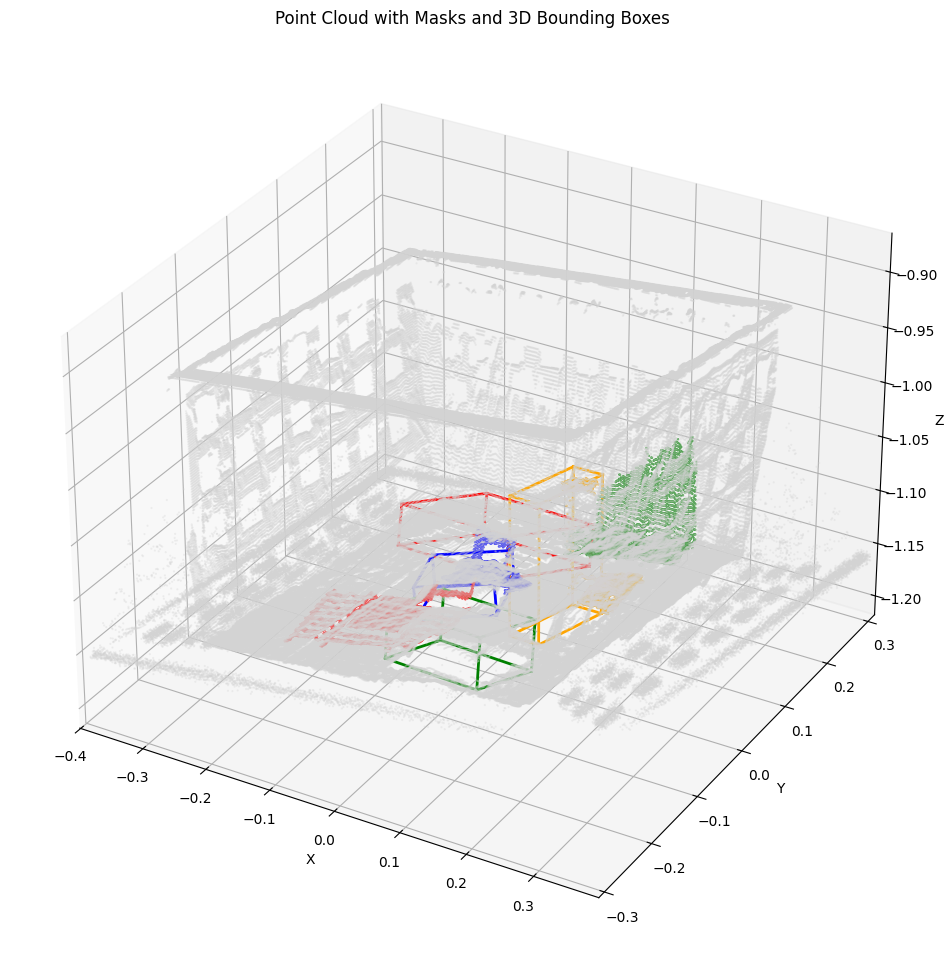

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# --- Load files ---
try:
    pc = np.load('/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/pc.npy')          # (3,H,W)
    bb_corners_3d = np.load('/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/bbox3d.npy')  # (4,8,3)
    mask = np.load('/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/mask.npy')      # (4,H,W)
    rgb_img = cv2.imread('/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/rgb.jpg')  # (H,W,3) BGR
    rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)  # convert to RGB
except FileNotFoundError as e:
    print(f"Error: A required file was not found. Details: {e}")
    exit()

# --- Prepare point cloud ---
H, W = pc.shape[1], pc.shape[2]
pc_data = np.moveaxis(pc, 0, -1)   # (H,W,3)
pc_data = np.flip(pc_data, axis=0) # flip rows (top<->bottom)
points = pc_data.reshape(-1, 3)    # flatten to (H*W,3)

# --- Fix orientation ---
points[:,1] *= -1              # Y axis flip
bb_corners_3d[:,:,1] *= -1

points[:,2] *= -1              # Z axis flip
bb_corners_3d[:,:,2] *= -1

# --- Flatten masks ---
num_objects = mask.shape[0]
masks_flat = mask.reshape(num_objects, -1).astype(bool)

# --- Visualization ---
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")

# Plot all points lightly
ax.scatter(points[:,0], points[:,1], points[:,2],
           c='lightgray', s=0.3, alpha=0.3)

# Unique colors per object
colors = ['red', 'blue', 'green', 'orange']

for i in range(num_objects):
    obj_points = points[masks_flat[i]]  # points inside mask
    ax.scatter(obj_points[:,0], obj_points[:,1], obj_points[:,2],
               c=colors[i], s=0.5, alpha=0.8)

    # Plot bounding box
    edges = [
        [0,1], [1,2], [2,3], [3,0],
        [4,5], [5,6], [6,7], [7,4],
        [0,4], [1,5], [2,6], [3,7]
    ]
    bbox = bb_corners_3d[i]
    for e in edges:
        p1, p2 = bbox[e[0]], bbox[e[1]]
        ax.plot(*zip(p1,p2), color=colors[i], linewidth=2)

# --- Set axes and view ---
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Point Cloud with Masks and 3D Bounding Boxes")
ax.view_init(elev=30, azim=-60)

# Optional: set axes limits
ax.set_xlim(np.min(points[:,0]), np.max(points[:,0]))
ax.set_ylim(np.min(points[:,1]), np.max(points[:,1]))
ax.set_zlim(np.min(points[:,2]), np.max(points[:,2]))

plt.show()


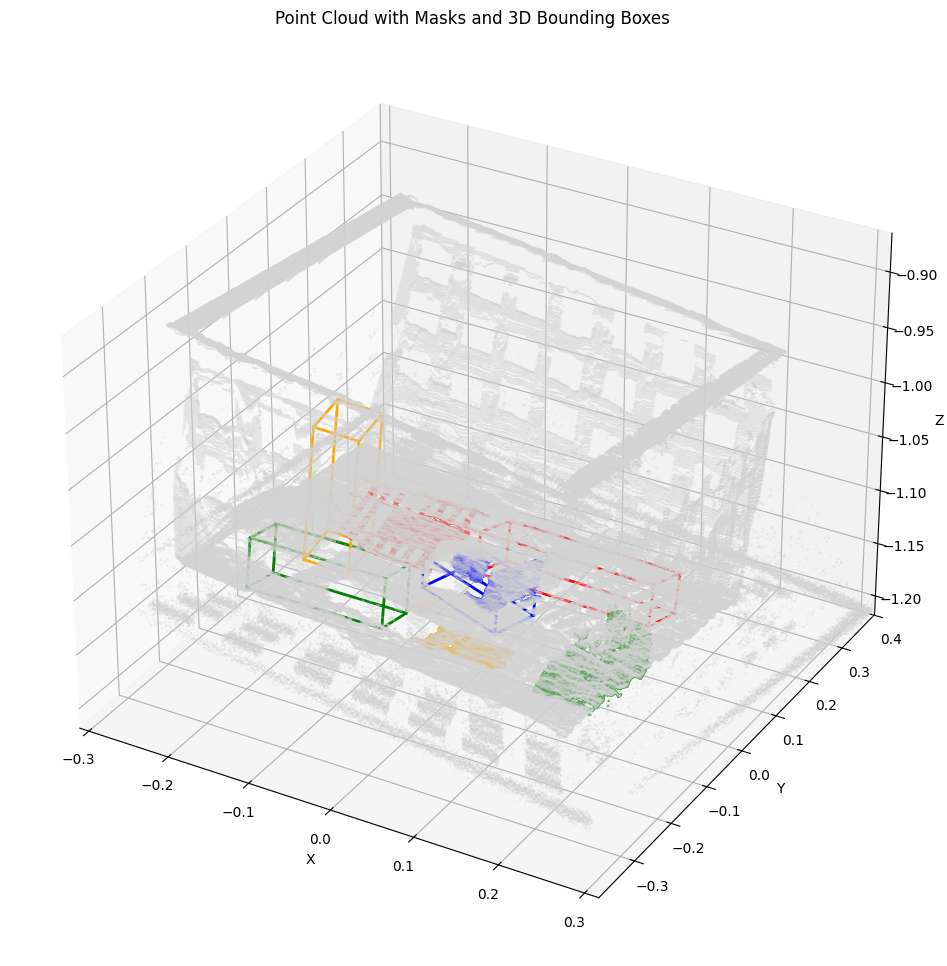

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# --- Load files ---
try:
    pc = np.load('/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/pc.npy')          # (3,H,W)
    bb_corners_3d = np.load('/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/bbox3d.npy')  # (4,8,3)
    mask = np.load('/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/mask.npy')      # (4,H,W)
    rgb_img = cv2.imread('/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/rgb.jpg')  # (H,W,3) BGR
    rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)  # convert to RGB
except FileNotFoundError as e:
    print(f"Error: A required file was not found. Details: {e}")
    exit()

# --- Prepare point cloud ---
H, W = pc.shape[1], pc.shape[2]
pc_data = np.moveaxis(pc, 0, -1)  # (H,W,3)
pc_data = np.flip(pc_data, axis=0)  # flip vertical axis
points = pc_data.reshape(-1,3)
points[:, [0,1]] = points[:, [1,0]]  # swap X and Y

# --- Flip axes to correct orientation ---
points[:,0] *= -1  # flip X
points[:,1] *= -1  # flip Y
points[:,2] *= -1  # flip Z

bb_corners_3d[:,:,0] *= -1
bb_corners_3d[:,:,1] *= -1
bb_corners_3d[:,:,2] *= -1

# --- Flatten masks ---
num_objects = mask.shape[0]
masks_flat = mask.reshape(num_objects, -1).astype(bool)

# --- Visualization ---
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# All points in light gray
ax.scatter(points[:,0], points[:,1], points[:,2],
           c='lightgray', s=0.3, alpha=0.3)

# Unique colors for each object
colors = ['red', 'blue', 'green', 'orange']

for i in range(num_objects):
    obj_points = points[masks_flat[i]]
    ax.scatter(obj_points[:,0], obj_points[:,1], obj_points[:,2],
               c=colors[i], s=0.5, alpha=0.8)

    # Draw bounding box
    edges = [
        [0,1], [1,2], [2,3], [3,0],
        [4,5], [5,6], [6,7], [7,4],
        [0,4], [1,5], [2,6], [3,7]
    ]
    bbox = bb_corners_3d[i]
    for e in edges:
        p1, p2 = bbox[e[0]], bbox[e[1]]
        ax.plot(*zip(p1,p2), color=colors[i], linewidth=2)

# --- Axes and view ---
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Point Cloud with Masks and 3D Bounding Boxes")
ax.view_init(elev=30, azim=-60)

ax.set_xlim(np.min(points[:,0]), np.max(points[:,0]))
ax.set_ylim(np.min(points[:,1]), np.max(points[:,1]))
ax.set_zlim(np.min(points[:,2]), np.max(points[:,2]))

plt.show()


In [41]:
import numpy as np
import open3d as o3d

# --- Load files ---
pc = np.load('/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/pc.npy')         # (3,H,W)
bb_corners_3d = np.load('/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/bbox3d.npy')  # (4,8,3)
mask = np.load('/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/mask.npy')     # (4,H,W)

# --- Prepare point cloud ---
H, W = pc.shape[1], pc.shape[2]
pc_data = np.moveaxis(pc, 0, -1)  # (H,W,3)
pc_data = np.flip(pc_data, axis=0)  # flip vertical
points = pc_data.reshape(-1,3)
points[:, [0,1]] = points[:, [1,0]]  # swap X/Y
points[:,0] *= -1
points[:,1] *= -1
points[:,2] *= -1

# --- Flatten masks ---
num_objects = mask.shape[0]
masks_flat = mask.reshape(num_objects, -1).astype(bool)

# --- Create Open3D point cloud ---
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.paint_uniform_color([0.8,0.8,0.8])  # light gray

# --- Prepare colored point clouds per object ---
colors = [
    [1,0,0],  # red
    [0,0,1],  # blue
    [0,1,0],  # green
    [1,0.5,0] # orange
]

pcd_objects = []
for i in range(num_objects):
    obj_points = points[masks_flat[i]]
    if obj_points.shape[0] == 0:
        continue
    pcd_obj = o3d.geometry.PointCloud()
    pcd_obj.points = o3d.utility.Vector3dVector(obj_points)
    pcd_obj.paint_uniform_color(colors[i % len(colors)])
    pcd_objects.append(pcd_obj)

# --- Create bounding box lines ---
bbox_linesets = []
for i in range(num_objects):
    bbox = bb_corners_3d[i]
    # 12 edges of a cube
    lines = [
        [0,1],[1,2],[2,3],[3,0],
        [4,5],[5,6],[6,7],[7,4],
        [0,4],[1,5],[2,6],[3,7]
    ]
    colors_line = [colors[i % len(colors)] for _ in lines]
    lineset = o3d.geometry.LineSet(
        points=o3d.utility.Vector3dVector(bbox),
        lines=o3d.utility.Vector2iVector(lines)
    )
    lineset.colors = o3d.utility.Vector3dVector(colors_line)
    bbox_linesets.append(lineset)

# --- Visualize ---
o3d.visualization.draw_geometries([pcd, *pcd_objects, *bbox_linesets],
                                  window_name="Point Cloud with 3D Bounding Boxes",
                                  width=1200, height=800,
                                  mesh_show_back_face=True)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D WARNING] GLFW Error: Failed to detect any supported platform
[Open3D WARNING] GLFW initialized for headless rendering.
[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [42]:
import open3d as o3d

# --- Collect all geometries ---
geometries = [pcd, *pcd_objects, *bbox_linesets]

# --- Use WebVisualizer for Jupyter ---
o3d.visualization.draw([{"name":"3D Viewer","geometry":geometries}])


[Open3D INFO] Window window_0 created.
[Open3D INFO] EGL headless mode enabled.
[Open3D INFO] ICE servers: ["stun:stun.l.google.com:19302", "turn:user:password@34.69.27.100:3478", "turn:user:password@34.69.27.100:3478?transport=tcp"]
FEngine (64 bits) created at 0x7647850 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
[Open3D INFO] Set WEBRTC_STUN_SERVER environment variable add a customized WebRTC STUN server.
[Open3D INFO] WebRTC Jupyter handshake mode enabled.


TypeError: add_geometry(): incompatible function arguments. The following argument types are supported:
    1. (self: open3d.cuda.pybind.visualization.O3DVisualizer, name: str, geometry: open3d.cuda.pybind.geometry.Geometry3D, material: open3d.cuda.pybind.visualization.rendering.MaterialRecord = None, group: str = '', time: float = 0.0, is_visible: bool = True) -> None
    2. (self: open3d.cuda.pybind.visualization.O3DVisualizer, name: str, geometry: open3d.cuda.pybind.t.geometry.Geometry, material: open3d.cuda.pybind.visualization.rendering.MaterialRecord = None, group: str = '', time: float = 0.0, is_visible: bool = True) -> None
    3. (self: open3d.cuda.pybind.visualization.O3DVisualizer, name: str, model: open3d.cuda.pybind.visualization.rendering.TriangleMeshModel, material: open3d.cuda.pybind.visualization.rendering.MaterialRecord = None, group: str = '', time: float = 0.0, is_visible: bool = True) -> None
    4. (self: object, d: dict) -> None

Invoked with: <open3d.cuda.pybind.visualization.O3DVisualizer object at 0x7f42c83474f0>, '3D Viewer', [PointCloud with 291967 points., PointCloud with 9435 points., PointCloud with 4192 points., PointCloud with 9553 points., PointCloud with 4031 points., LineSet with 12 lines., LineSet with 12 lines., LineSet with 12 lines., LineSet with 12 lines.], None, '', 0.0, True

In [45]:
import numpy as np
import open3d as o3d

# --- Load files ---
pc = np.load('/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/pc.npy')          # (3,H,W)
bb_corners_3d = np.load('/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/bbox3d.npy')  # (4,8,3)
mask = np.load('/home/as2114/code/3DBB/data/dl_challenge/8b061a8a-9915-11ee-9103-bbb8eae05561/mask.npy')      # (4,H,W)

# --- Prepare point cloud ---
H, W = pc.shape[1], pc.shape[2]
pc_data = np.moveaxis(pc, 0, -1)  # (H,W,3)
pc_data = np.flip(pc_data, axis=0)  # flip vertical
points = pc_data.reshape(-1,3)

# Swap X/Y and flip all axes to match natural 3D orientation
points[:, [0,1]] = points[:, [1,0]]
points[:,0] *= -1
points[:,1] *= -1
points[:,2] *= -1

# --- Flatten masks ---
num_objects = mask.shape[0]
masks_flat = mask.reshape(num_objects, -1).astype(bool)

# --- Create main point cloud (gray) ---
pcd = o3d.t.geometry.PointCloud()
pcd.point["positions"] = o3d.core.Tensor(points, dtype=o3d.core.Dtype.Float32)
pcd.point["colors"] = o3d.core.Tensor(np.tile([0.8,0.8,0.8], (points.shape[0],1)), dtype=o3d.core.Dtype.Float32)

# --- Prepare colored point clouds per object ---
colors = [
    [1,0,0], [0,0,1], [0,1,0], [1,0.5,0]
]
pcd_objects = []
for i in range(num_objects):
    obj_points = points[masks_flat[i]]
    if obj_points.shape[0] == 0:
        continue
    pcd_obj = o3d.t.geometry.PointCloud()
    pcd_obj.point["positions"] = o3d.core.Tensor(obj_points, dtype=o3d.core.Dtype.Float32)
    pcd_obj.point["colors"] = o3d.core.Tensor(
        np.tile(colors[i % len(colors)], (obj_points.shape[0],1)),
        dtype=o3d.core.Dtype.Float32
    )
    pcd_objects.append(pcd_obj)

# --- Create LineSets for bounding boxes ---
bbox_linesets = []
for i in range(num_objects):
    bbox = bb_corners_3d[i]
    lines = [
        [0,1],[1,2],[2,3],[3,0],
        [4,5],[5,6],[6,7],[7,4],
        [0,4],[1,5],[2,6],[3,7]
    ]
    colors_line = np.tile(colors[i % len(colors)], (len(lines),1))
    
    # Use positional arguments only for LineSet
    lineset = o3d.t.geometry.LineSet(
        o3d.core.Tensor(bbox, dtype=o3d.core.Dtype.Float32),
        o3d.core.Tensor(lines, dtype=o3d.core.Dtype.Int32)
    )
    lineset.line["colors"] = o3d.core.Tensor(colors_line, dtype=o3d.core.Dtype.Float32)
    bbox_linesets.append(lineset)

# --- Visualize in Jupyter WebVisualizer ---
vis = o3d.visualization.O3DVisualizer()
vis.show_settings = True
vis.show_axes = True
vis.show_skybox = False
vis.set_background([1,1,1,1])

# Add geometries one by one
vis.add_geometry("main_pcd", pcd)
for i, obj in enumerate(pcd_objects):
    vis.add_geometry(f"obj_{i}", obj)
for i, lineset in enumerate(bbox_linesets):
    vis.add_geometry(f"bbox_{i}", lineset)

vis


[Open3D INFO] Window window_1 created.


AttributeError: 'open3d.cuda.pybind.visualization.O3DVisualizer' object attribute 'show_skybox' is read-only

In [46]:
vis = o3d.visualization.O3DVisualizer()
vis.show_settings = True
vis.show_axes = True
vis.set_background([1, 1, 1, 1])  # white background

# Add geometries one by one
vis.add_geometry("main_pcd", pcd)
for i, obj in enumerate(pcd_objects):
    vis.add_geometry(f"obj_{i}", obj)
for i, lineset in enumerate(bbox_linesets):
    vis.add_geometry(f"bbox_{i}", lineset)

vis


[Open3D INFO] Window window_2 created.


TypeError: set_background(): incompatible function arguments. The following argument types are supported:
    1. (self: open3d.cuda.pybind.visualization.O3DVisualizer, bg_color: numpy.ndarray[numpy.float32[4, 1]], bg_image: open3d.cuda.pybind.geometry.Image) -> None

Invoked with: <open3d.cuda.pybind.visualization.O3DVisualizer object at 0x7f43a3f44ff0>, [1, 1, 1, 1]

In [47]:
import numpy as np

bg_color = np.array([[1.0],[1.0],[1.0],[1.0]], dtype=np.float32)  # shape (4,1)
vis.set_background(bg_color)


TypeError: set_background(): incompatible function arguments. The following argument types are supported:
    1. (self: open3d.cuda.pybind.visualization.O3DVisualizer, bg_color: numpy.ndarray[numpy.float32[4, 1]], bg_image: open3d.cuda.pybind.geometry.Image) -> None

Invoked with: <open3d.cuda.pybind.visualization.O3DVisualizer object at 0x7f43a3f44ff0>, array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [48]:
vis = o3d.visualization.O3DVisualizer()
vis.show_settings = True
vis.show_axes = True
# vis.set_background(...)  # skip this in Jupyter

# Add geometries one by one
vis.add_geometry("main_pcd", pcd)
for i, obj in enumerate(pcd_objects):
    vis.add_geometry(f"obj_{i}", obj)
for i, lineset in enumerate(bbox_linesets):
    vis.add_geometry(f"bbox_{i}", lineset)

vis


[Open3D INFO] Window window_3 created.
